In [136]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression 
from sklearn import linear_model
from sklearn.model_selection import cross_val_score , KFold
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression



import os
for dirname, _, filenames in os.walk('C:/Users/monamoe/Documents/1_Work_Stuff/2_Projects/1_Commerce/Data/'):
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        a = ""

# data = pd.read_csv("D:/!_WORKING_STUFF/2_Projects/1_Commerce/Data/Amazon Sale Report.csv")
data = pd.read_csv("C:/Users/monamoe/Documents/1_Work_Stuff/2_Projects/1_Commerce/Data/Amazon Sale Report.csv")



In [3]:
data.head()


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [5]:
data.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,128975.0,NaN,NaN,NaN,64487.0,37232.019822,0.0,32243.5,64487.0,96730.5,128974.0
Order ID,128975,120378,171-5057375-2831560,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,128975,91,2005-03-22,2085,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,128975,13,Shipped,77804,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fulfilment,128975,2,Amazon,89698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales Channel,128975,2,Amazon.in,128851,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ship-service-level,128975,2,Expedited,88615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Style,128975,1377,JNE3797,4224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SKU,128975,7195,JNE3797-KR-L,773,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,128975,9,Set,50284,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.describe()


,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [63]:
# Fixing Date
data['Date']= pd.to_datetime(data['Date'])
print(data.dtypes)

index                          int64
Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Style                         object
SKU                           object
Category                      object
Size                          object
ASIN                          object
Courier Status                object
Qty                            int64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code             float64
ship-country                  object
promotion-ids                 object
B2B                             bool
fulfilled-by                  object
Month                          int32
dtype: object


Columns contain null values : 
Courier Status
currency
Amount
ship-city
ship-state
ship-postal-code
ship-country
promotion-ids
fulfilled-by


<Axes: >

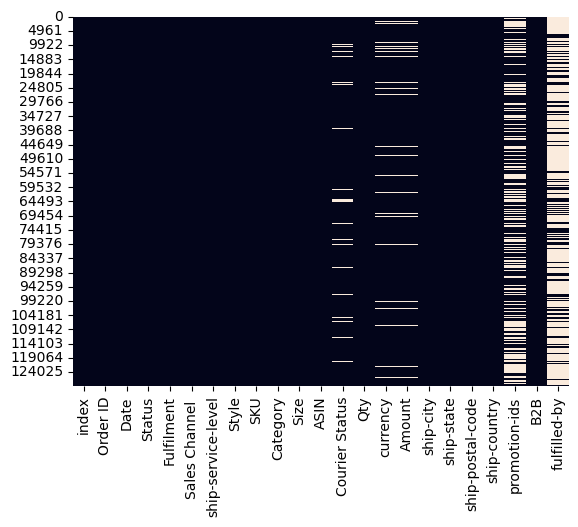

In [8]:
data.isnull().sum()
null_columns = data.columns[data.isnull().any()]
print('Columns contain null values : ')
for col in null_columns:
    print(col)


sns.heatmap(data.isnull(),cbar=False)


In [76]:
# Filling null values with the most common value inside that column
for col in data.columns:
    counter = counter +1 
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].mean(), inplace=True)
        



C:\Users\monamoe\AppData\Local\Temp\ipykernel_8712\1137946682.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
C:\Users\monamoe\AppData\Local\Temp\ipykernel_8712\1137946682.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

Columns contain null values : 


<Axes: >

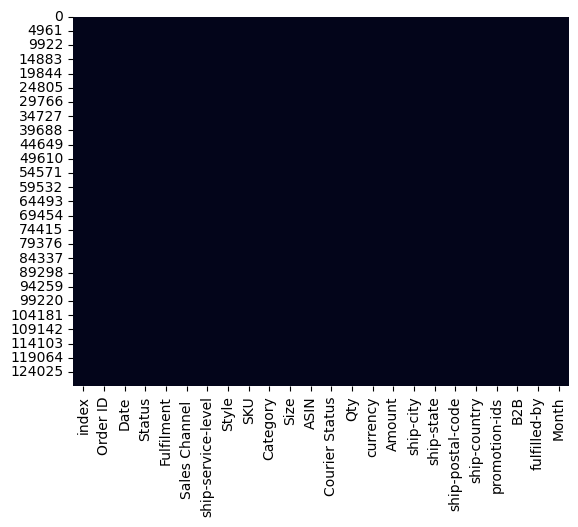

In [78]:
data.isnull().sum()

null_columns = data.columns[data.isnull().any()]
print('Columns contain null values : ')
for col in null_columns:
    print(col)


sns.heatmap(data.isnull(),cbar=False)


In [12]:
data.describe()

,index,Date,Qty,Amount,ship-postal-code
count,128975.000000,128975,128975.000000,128975.000000,128975.000000
mean,64487.000000,2015-02-25 17:19:50.881954048,0.904431,648.561465,463966.236509
min,0.000000,2004-01-22 00:00:00,0.000000,0.000000,110001.000000
25%,32243.500000,2005-08-22 00:00:00,1.000000,459.000000,382421.000000
50%,64487.000000,2022-04-18 00:00:00,1.000000,635.000000,500033.000000
75%,96730.500000,2022-05-22 00:00:00,1.000000,771.000000,600024.000000
max,128974.000000,2022-06-29 00:00:00,15.000000,5584.000000,989898.000000
std,37232.019822,NaN,0.313354,272.581240,191452.267223


In [80]:
data.describe(include='object')

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country,promotion-ids,fulfilled-by
count,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975
unique,120378,13,2,2,2,1377,7195,9,11,7190,3,1,8955,69,1,5787,1
top,171-5057375-2831560,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,INR,BENGALURU,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,Easy Ship
freq,12,77804,89698,128851,88615,4224,773,50284,22711,773,116359,128975,11250,22293,128975,95253,128975


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128975 non-null  int64         
 1   Order ID            128975 non-null  object        
 2   Date                128975 non-null  datetime64[ns]
 3   Status              128975 non-null  object        
 4   Fulfilment          128975 non-null  object        
 5   Sales Channel       128975 non-null  object        
 6   ship-service-level  128975 non-null  object        
 7   Style               128975 non-null  object        
 8   SKU                 128975 non-null  object        
 9   Category            128975 non-null  object        
 10  Size                128975 non-null  object        
 11  ASIN                128975 non-null  object        
 12  Courier Status      128975 non-null  object        
 13  Qty                 128975 no

<Axes: >

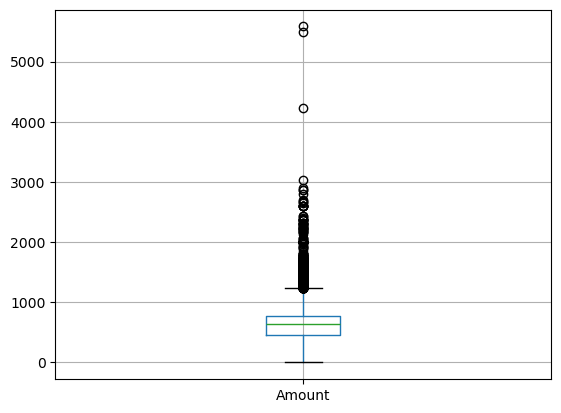

In [92]:
# data[['ship-postal-code']].boxplot()
data[['Amount']].boxplot()

In [17]:
# distribution
for col in data.columns :
    print('_'*40)
    print(col)
    print(data[col].value_counts())


________________________________________
index
index
0         1
85979     1
85992     1
85991     1
85990     1
         ..
42986     1
42985     1
42984     1
42983     1
128974    1
Name: count, Length: 128975, dtype: int64
________________________________________
Order ID
Order ID
171-5057375-2831560    12
403-4984515-8861958    12
403-0173977-3041148    11
404-9932919-6662730    11
408-3317403-1729937    10
                       ..
403-2697348-7766749     1
405-0271223-6692335     1
406-7498475-4257161     1
402-2493916-3621929     1
408-7436540-8728312     1
Name: count, Length: 120378, dtype: int64
________________________________________
Date
Date
2005-03-22    2085
2005-02-22    2079
2005-04-22    2015
2022-04-14    1883
2022-04-15    1853
              ... 
2022-06-23    1090
2022-06-24    1028
2022-06-25    1026
2022-06-29     658
2022-03-31     171
Name: count, Length: 91, dtype: int64
________________________________________
Status
Status
Shipped                          

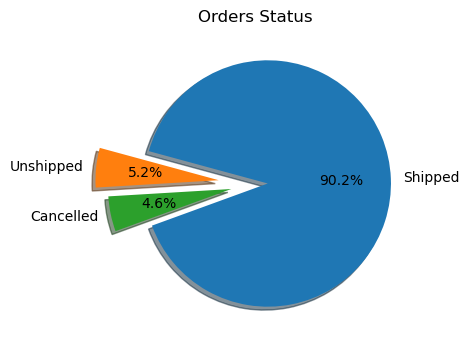

In [98]:

Status_count = data['Courier Status'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(Status_count, labels=Status_count.index, autopct='%3.1f%%', startangle=200,explode=(0.1,0.3,0.2),shadow=True)
# plt.pie(Status_count, labels=Status_count.index, shadow=True,)

plt.title('Orders Status')
plt.show()



# plt.figure(figsize=(6,6))
# plt.pie(Status_count, labels=Status_count.index, autopct='%1.1f%%', startangle=30,explode=(0.1,0.3,0.2),shadow=True)

# plt.title('Orders Status')
# plt.show()




C:\Users\monamoe\AppData\Local\Temp\ipykernel_8712\377599041.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Size'],data=data,palette='Set3')


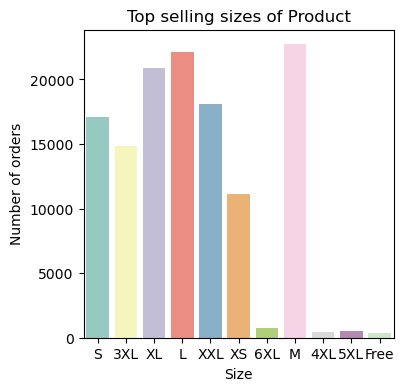

In [114]:

plt.figure(figsize=(4,4 ))
sns.countplot(x=data['Size'],data=data,palette='Set3')

plt.xlabel('Size')
plt.ylabel('Number of orders')
plt.title('Top selling sizes of Product')

plt.show()



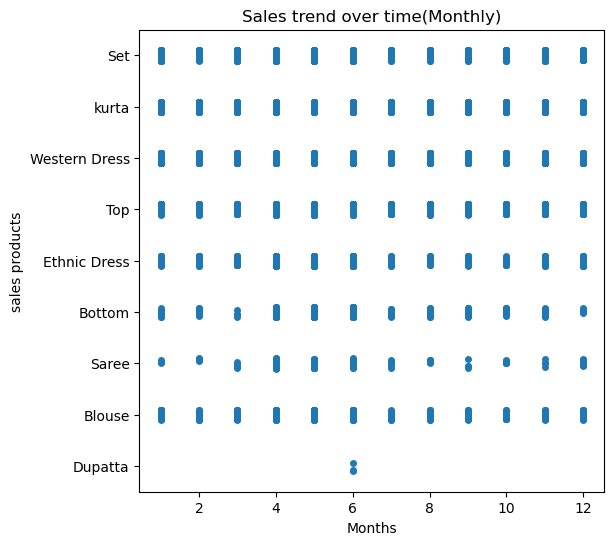

In [112]:

data['Month'] = data['Date'].dt.month

plt.figure(figsize=(6, 6))
x=sns.stripplot(x='Month', y='Category', data=data)

plt.xlabel('Months')
plt.ylabel('sales products')
plt.title('Sales trend over time(Monthly)')

plt.show()


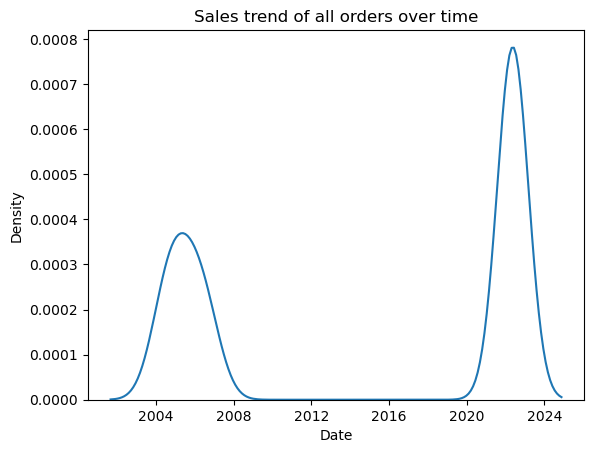

In [118]:
sns.kdeplot(data=data,x="Date")
plt.title('Sales trend of all orders over time')
plt.show()

In [22]:
data.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Month'],
      dtype='object')

In [23]:
data1 = data.copy()


B2B_map = { False : 0 , True : 1 }
category_map = {'Shipped': 1, 'Unshipped': 0 , 'Cancelled' : -1}
Fulfilment_map = { 'Amazon' : 1 ,'Merchant' : 0 }
ship_service_level_map = { 'Expedited' : 1 , 'Standard' : 0}


data1['Courier Status'] = data['Courier Status'].map(category_map)
data1['B2B']=data['B2B'].map(B2B_map)
data1['Fulfilment']=data['Fulfilment'].map(Fulfilment_map)
data1['ship-service-level']=data['ship-service-level'].map(ship_service_level_map)



In [24]:
data1.sample(n=4)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Month
46764,46764,406-7359185-9016341,2004-02-22,Shipped,1,Amazon.in,1,J0230,J0230-SKD-L,Set,...,INR,999.0,Margao,GOA,403709.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,0,Easy Ship,2
91155,91155,408-9470688-1581128,2022-04-30,Shipped,1,Amazon.in,1,MEN5022,MEN5022-KR-XXL,kurta,...,INR,549.0,BENGALURU,KARNATAKA,560038.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,0,Easy Ship,4
121418,121418,402-3714717-3735563,2006-06-22,Shipped,1,Amazon.in,1,SET327,SET327-KR-DPT-XXXL,Set,...,INR,999.0,KAKINADA,ANDHRA PRADESH,533001.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,0,Easy Ship,6
62869,62869,407-2147647-2217902,2022-05-20,Shipped,1,Amazon.in,1,JNE3734,JNE3734-KR-XXXL,kurta,...,INR,431.0,THIRUVANANTHAPURAM,KERALA,695005.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,0,Easy Ship,5


In [170]:
numerical_cols = data1.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols


['index',
 'Fulfilment',
 'ship-service-level',
 'Courier Status',
 'Qty',
 'Amount',
 'ship-postal-code',
 'B2B']

....................
Mean Squared Error (MSE): 0.13807947276603993


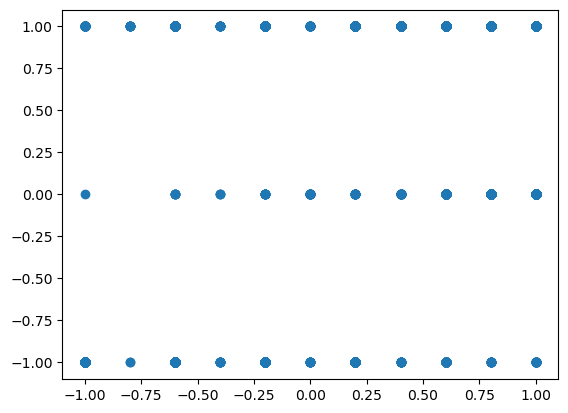

In [172]:
# X = data1['Fulfilment','ship-service-level','Qty','Amount','ship-postal-code','B2B','Month'] 
cols=['Fulfilment','ship-service-level','Qty','Amount','ship-postal-code','B2B','Month']

# Preparing X,Y 
# X represents everything you're using to make a prediction
# Y represents target value, the prediction we are making
X = data1[['Fulfilment','ship-service-level','Qty','Amount','ship-postal-code','B2B','Month']]
Y = data1['Courier Status'] 

# prepairing data for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=45)

# creating a model
# model = LogisticRegression()
model = KNeighborsRegressor()
# model = LinearRegression()

# training the model on the data
model.fit(X_train, y_train)

#testing the model
y_pred = model.predict(X_test)

# calculating and priting model accuracy using mean squared error formula
mse = mean_squared_error(y_test, y_pred)
# print(X_test.head(7))
print('....................')
print("Mean Squared Error (MSE):", mse)

plt.scatter(y_pred, y_test )



In [174]:
cv = KFold(n_splits=5, shuffle=True, random_state=45)  

scores = cross_val_score(model, X, Y, cv=cv, scoring='accuracy')

print("Cross-Validation Accuracy Scores:")
print(scores)
print('_'*30)
print(f"Mean Cross-Validation Accuracy: {scores.mean():.2f}")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py", line 213, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
 

Cross-Validation Accuracy Scores:
[nan nan nan nan nan]
______________________________
Mean Cross-Validation Accuracy: nan


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py", line 213, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
 

In [176]:
# Evaluating model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy :.2f}")
print('_'*30)
print("Classification Report:")
print(classification_rep)



ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

RF Model Accuracy: 0.95
______________________________
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1798
           0       1.00      0.00      0.00      2020
           1       0.95      1.00      0.97     34875

    accuracy                           0.95     38693
   macro avg       0.98      0.67      0.66     38693
weighted avg       0.95      0.95      0.92     38693



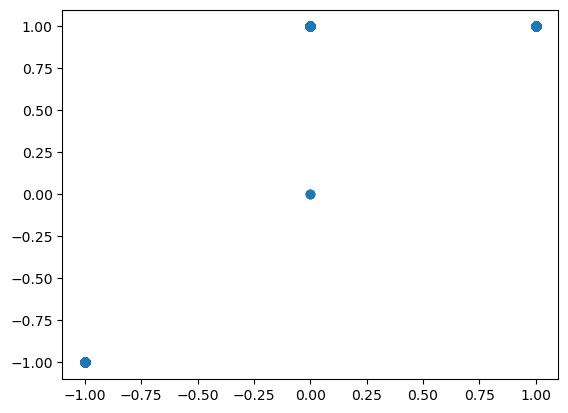

In [184]:
cols=['Fulfilment','ship-service-level','Qty','Amount','ship-postal-code','B2B','Month']

Y = data1['Courier Status'] 
X = data1[cols]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=45)

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, Y)
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"RF Model Accuracy: {accuracy:.2f}")
print('_'*30)

report = classification_report(y_test, predictions)
plt.scatter(y_test,predictions)
print(report)